[참고 블로그_1](https://dreamgonfly.github.io/blog/word2vec-explained/) [참고 블로그_2](https://analytics4everything.tistory.com/200)

# one hot encoding 실습

In [ ]:
import numpy as np

In [ ]:
# 입력 문장 (모델 입력)
raw_inputs = [
             "나는 학생 입니다",
             "나는 좋은 선생님 입니다",
             "당신은 매우 좋은 선생님 입니다"
]

# 정답 학생(1) 기타(0)
raw_labels = [1, 0, 0]

In [ ]:
# 단어장 만들기
words = []
for s in raw_inputs:
    words.extend(s.split())

In [ ]:
print(words)

['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '선생님', '입니다']


In [ ]:
# 중복된 단어 제거
words = list(dict.fromkeys(words))                                               # set을 사용하여 중복을 제거한다면 tolist()로 다시 묶어주어야 한다,

In [ ]:
print(words)

['나는', '학생', '입니다', '좋은', '선생님', '당신은', '매우']


In [ ]:
# 스페셜 토큰 넣기
word_to_id = {'<PAD>' : 0, '<UNK>' : 1}

for w in words:
    word_to_id[w] = len(word_to_id)
    print(word_to_id)

{'<PAD>': 0, '<UNK>': 1, '나는': 2}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7, '매우': 8}


In [ ]:
word_to_id.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('나는', 2), ('학생', 3), ('입니다', 4), ('좋은', 5), ('선생님', 6), ('당신은', 7), ('매우', 8)])

In [ ]:
id_to_words = {i : w for w, i in word_to_id.items()}

In [ ]:
print(id_to_words)

{0: '<PAD>', 1: '<UNK>', 2: '나는', 3: '학생', 4: '입니다', 5: '좋은', 6: '선생님', 7: '당신은', 8: '매우'}


In [ ]:
# 패딩 처리
train_inputs = []

# 문장마다 시퀀스 변환하는 과정
for s in raw_inputs:
    row = [word_to_id[w] for w in s.split()]

    # padding
    row += [0] * (5-len(row))
    train_inputs.append(row)

train_inputs = np.array(train_inputs)

print(train_inputs)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


    "나는 학생 입니다",
    "나는 좋은 선생님 입니다",
    "당신은 매우 좋은 선생님 입니다"

In [ ]:
train_inputs.shape

(3, 5)

In [ ]:
# one-hot matrix 생성        ->     단어장을 기반으로 one-hot vector로 표현
onehot_matrix = np.eye(len(word_to_id))                                                                                                    # eye로 초기화
print(onehot_matrix)         # -> 첫번째 줄은 pad, 두번째는 unk, 세번째는 '나는', 네번째는 '학생' ...
                             # {0: '<PAD>', 1: '<UNK>', 2: '나는', 3: '학생', 4: '입니다', 5: '좋은', 6: '선생님', 7: '당신은', 8: '매우'}

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
train_onehot = onehot_matrix[train_inputs] 
print(train_onehot)                                # 모든 단어의 거리가 루트2를 가지기 때문에 분간하기 위해 필요없는 데이터가 많이 필요하다

[[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]]


    "나는 학생 입니다",
    "나는 좋은 선생님 입니다",
    "당신은 매우 좋은 선생님 입니다"

In [ ]:
train_onehot.shape

(3, 5, 9)

In [ ]:
print(np.argmax(train_onehot, axis = -1))                                        # 가장 큰 값의 인덱스를 반환

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [ ]:
x = np.argmax(train_onehot, axis = -1)

# [Embedding](https://wikidocs.net/33520)

단어를 벡터로 표현하는 방법으로, 단어를 밀집 표현으로 변환

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [ ]:
x_len = train_onehot.shape

In [ ]:
print(x_len)

(3, 5, 9)


In [ ]:
inp = tf.convert_to_tensor(x, dtype = tf.int32)
inp_len = tf.convert_to_tensor(x_len, dtype = tf.int32)

In [ ]:
print(inp); print()
print(inp_len)

tf.Tensor(
[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]], shape=(3, 5), dtype=int32)

tf.Tensor([3 5 9], shape=(3,), dtype=int32)


In [ ]:
vocab_size = 1000
dim = 10                                       # Embedding은 차원을 직접 설정할 수 있다. 보통 512 정도가 최대로 생각하면 좋다    - 관계라고 생각하면 편할 것 같다. 하나의 단어를 생성하고 그 단어와 다른 단어의 거리를 여러 차원의 거리로 설명
embed = L.Embedding(vocab_size, dim)

In [ ]:
embed(inp)                                    # tensorflow가 blackbox이므로 정확한 과정은 알 수 없다. -> 돌릴 때마다 달라짐

<tf.Tensor: shape=(3, 5, 10), dtype=float32, numpy=
array([[[ 0.00655482,  0.0456869 ,  0.04045328, -0.03215405,
         -0.04355735, -0.00489546,  0.00845113, -0.02387035,
         -0.02457668, -0.04706734],
        [ 0.03719189, -0.00619446,  0.04663577,  0.03034096,
          0.04197416, -0.00467756, -0.03039037,  0.04872331,
         -0.02763587, -0.00904227],
        [ 0.00638758, -0.03336792,  0.02249092, -0.04112915,
         -0.01182742, -0.03243872,  0.00785006, -0.03744887,
          0.01755973, -0.04438806],
        [ 0.01669304,  0.00698538,  0.01309664, -0.03509996,
          0.0224604 , -0.0339416 ,  0.02053528,  0.03118766,
         -0.04480833, -0.03690969],
        [ 0.01669304,  0.00698538,  0.01309664, -0.03509996,
          0.0224604 , -0.0339416 ,  0.02053528,  0.03118766,
         -0.04480833, -0.03690969]],

       [[ 0.00655482,  0.0456869 ,  0.04045328, -0.03215405,
         -0.04355735, -0.00489546,  0.00845113, -0.02387035,
         -0.02457668, -0.04706734]

    "나는 학생 입니다",
    "나는 좋은 선생님 입니다",
    "당신은 매우 좋은 선생님 입니다"

# [Word2Vec](https://wikidocs.net/22660)

단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화 할 수 있는 방법

## abc 뉴스데이터로 word2vec

In [5]:
from nltk.corpus import abc
import nltk

nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
corpus = abc.sents()

In [ ]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [ ]:
print('코퍼스의 크기 : ', len(corpus))

코퍼스의 크기 :  29059


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, size = 100, window=5, min_count=5, workers=4, sg=0)

# size = 워드 벡터의 특징 값, 임베딩 된 벡터의 차원의 벡터
# window = context window의 크기                                                 window = 5 일 경우, 중심단어 앞 5개, 뒤 5개를 선택하는 것을 말한다.
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram

In [ ]:
# word2vec은 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model, wv, most_similar을 지원합니다.

model_result = model.wv.most_similar('man')

In [ ]:
print(model_result)

[('woman', 0.9317559003829956), ('Bang', 0.9254369139671326), ('asteroid', 0.9180091023445129), ('third', 0.916307270526886), ('skull', 0.9140692353248596), ('rally', 0.913643479347229), ('flare', 0.9035558700561523), ('infant', 0.9030907154083252), ('dinosaur', 0.9020611047744751), ('baby', 0.9009242057800293)]


In [ ]:
from gensim.models import KeyedVectors

# 저장
model.wv.save_word2vec_format('./w2v')

In [ ]:
# 저장한 내용 불러오기
loaded_model = KeyedVectors.load_word2vec_format('./w2v')
print('model load 완료')

model load 완료


In [ ]:
model_result = loaded_model.wv.most_similar('man')
print(model_result)

[('woman', 0.9317559003829956), ('Bang', 0.9254369139671326), ('asteroid', 0.9180091023445129), ('third', 0.916307270526886), ('skull', 0.9140692353248596), ('rally', 0.913643479347229), ('flare', 0.9035558700561523), ('infant', 0.9030907154083252), ('dinosaur', 0.9020611047744751), ('baby', 0.9009242057800293)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
loaded_model.most_similar('overacting')

KeyError: ignored

In [ ]:
loaded_model.most_similar('memory')

[('jolt', 0.9723538160324097),
 ('structures', 0.9712166786193848),
 ('springs', 0.9705914855003357),
 ('video', 0.9702949523925781),
 ('chasing', 0.9692455530166626),
 ('lifting', 0.9686984419822693),
 ('semen', 0.9686689376831055),
 ('display', 0.9685083031654358),
 ('infection', 0.9683456420898438),
 ('polymer', 0.9680090546607971)]

In [ ]:
loaded_model.most_similar('memorry')

KeyError: ignored

In [ ]:
loaded_model.most_similar('한글')


KeyError: ignored

## 한국어 word2vec 만들기

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 40.0 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fcfe4f1c310>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
train_data.info

<bound method DataFrame.info of               id                                           document  label
0        8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1        8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2        4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3        9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4       10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1
...          ...                                                ...    ...
199995   8963373                                     포켓 몬스터 짜가 ㅡㅡ;;      0
199996   3302770                                              쓰.레.기      0
199997   5458175                  완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.      0
199998   6908648                왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ      0
199999   8548411                                    포풍저그가나가신다영차영차영차      0

[200000 rows x 3 columns]>

In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
# null 값 존재유무 확인
train_data.isnull().sum(axis = 0)

id          0
document    8
label       0
dtype: int64

In [ ]:
# null 값이 존재하는 행 제거
train_data = train_data.dropna(how = 'any')

print(train_data.isnull().values.any())
print('Null 값을 제외한 샘플의 수 : ', len(train_data))

False
Null 값을 제외한 샘플의 수 :  199992


In [ ]:
# 한글과 공백을 제외한 텍스트 제거
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

# 텍스트를 제거한 후, 생길 수 있는 공백을 Nan 값으로 변경
train_data['document'].replace('', np.nan, inplace = True)

print(train_data.isnull().values.any())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


True


In [ ]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [ ]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
print('Null 값을 제외한 샘플의 수 : ', len(train_data))

Null 값을 제외한 샘플의 수 :  198912


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 불용어 제거 및 토큰화 적용
okt = Okt()
tokenized_data = []

for sentence in train_data['document']:
    temp_x = okt.morphs(sentence, stem = True)
    temp_x = [word for word in temp_x if not word in stopwords]
    tokenized_data.append(temp_x)

리뷰의 최대 길이 :  72
리뷰의 평균 길이 :  10.774890403796654


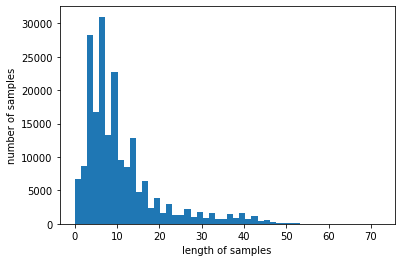

In [ ]:
# 리뷰의 길이 분포 확인
print('리뷰의 최대 길이 : ', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 : ', sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 5, sg = 0)

In [ ]:
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar('최민식'))

[('한석규', 0.8457081317901611), ('올드보이', 0.8436345458030701), ('크로우', 0.8411780595779419), ('이민호', 0.8352824449539185), ('이미숙', 0.8346011638641357), ('브란도', 0.8339086174964905), ('채민서', 0.8337661027908325), ('최민수', 0.8323861956596375), ('주진모', 0.8253077268600464), ('안성기', 0.823963463306427)]


In [ ]:
print(model.wv.most_similar('히어로'))

[('슬래셔', 0.8759568929672241), ('느와르', 0.852349579334259), ('무협', 0.8372067213058472), ('호러', 0.8357107639312744), ('블록버스터', 0.8331280946731567), ('물', 0.822371780872345), ('물의', 0.808323323726654), ('로코', 0.8054017424583435), ('무비', 0.8016309142112732), ('정통', 0.7963252067565918)]


In [ ]:
print(model.wv.most_similar('뽀로로'))

[('마다가스카', 0.8724256753921509), ('홍보물', 0.8702356219291687), ('야호', 0.8668067455291748), ('더라도', 0.8663264513015747), ('어택', 0.8577384948730469), ('스트리트', 0.8572725057601929), ('ㄳ', 0.8553969860076904), ('스파이키드', 0.854840874671936), ('퓨리', 0.8539544343948364), ('아낰', 0.8530369997024536)]


In [ ]:
print(model.wv.most_similar('영화'))

[('독립영화', 0.5955471396446228), ('애니메이션', 0.5912259817123413), ('공포영화', 0.5799123644828796), ('애니', 0.5634041428565979), ('이영화', 0.5404583811759949), ('영화로', 0.5392232537269592), ('다큐멘터리', 0.5366272926330566), ('액션영화', 0.5186909437179565), ('다큐', 0.5182144641876221), ('수작', 0.5126124620437622)]


In [ ]:
print(model.wv.most_similar('구광림'))

KeyError: ignored

## 사전에 훈련된 word embedding을 활용(한국어)

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
import gensim
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/dataset/ko.bin')

In [139]:
print(model)

Word2Vec(vocab=30185, size=200, alpha=0.025)


In [ ]:
result = model.wv.most_similar("강아지", topn=50) # 상위 50개
result

## 사전 훈련된 워드 임베딩 (영어)

In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
del model

In [142]:
print(model.vectors.shape) # 300만개의 단어와 각 단어 차원이 300차원

(3000000, 300)


In [143]:
print(model.similarity('this', 'is'))

0.40797037


In [144]:
print(model.similarity('post', 'book'))

0.057204384


In [145]:
print(model['book']) # 300차원

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [2]:
model.most_similar('memory')

[('Memory', 0.6844282150268555),
 ('memories', 0.6138081550598145),
 ('Added_Tarbet', 0.5560144186019897),
 ('Earliest_sporting', 0.5375796556472778),
 ('Flash_memory', 0.5318928360939026),
 ('foam_mattress_topper', 0.5253582000732422),
 ('flash_memory', 0.5221431255340576),
 ('remembering', 0.5171269178390503),
 ('SODIMM_modules', 0.5119421482086182),
 ('components_microprocessors_CPUs', 0.5007408857345581)]

## FastText

성능적으로 가볍다

    n = 3   ->   <apple>   ->   <ap, app, ppl, ple, le>

In [4]:
# subword로 학습
from gensim.models import FastText

In [7]:
model = FastText(corpus, size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

In [8]:
from gensim.models import Word2Vec
model_wv = Word2Vec(sentences = corpus, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [9]:
model_wv.wv.most_similar("electrofishing")       # Word2Vec  ->  단어장에 없는 단어는 오류로 출력한다

KeyError: ignored

In [10]:
model.wv.most_similar('electrofishing')               # FastText  ->  단어장에 없는 단어를 분석하여 비슷한 내용의 유사도를 출력한다

[('electric', 0.8970085382461548),
 ('electrode', 0.8769841194152832),
 ('electricity', 0.8756001591682434),
 ('electrodes', 0.869384765625),
 ('electronics', 0.8420356512069702),
 ('electronic', 0.8384878039360046),
 ('electrons', 0.8379313349723816),
 ('electron', 0.8280298709869385),
 ('electrical', 0.8202918171882629),
 ('aircraft', 0.8193583488464355)]

## Glove

In [11]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 4.2 MB/s 


In [12]:
from glove import Corpus, Glove

In [15]:
Corpus = Corpus()

In [17]:
Corpus.fit(corpus, window = 5)

In [18]:
glove = Glove(no_components = 100, learning_rate = 0.05)

In [19]:
glove.fit(Corpus.matrix, epochs = 10, no_threads = 4, verbose = True)
glove.add_dictionary(Corpus.dictionary)

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [20]:
print(glove.most_similar('man'))

[('dog', 0.9726785531556592), ('child', 0.9673029915751961), ('person', 0.9401286268673414), ('patient', 0.9362461594426567)]


In [21]:
print(glove.most_similar('boy'))

[('harmless', 0.9870761327172559), ('negotiation', 0.9866950639136881), ('cocker', 0.9865711166282293), ('vertebrate', 0.9863793135236401)]


In [22]:
print(glove.most_similar('university'))

[('moon', 0.9749662299966824), ('state', 0.9667858076420115), ('nation', 0.9645783433561443), ('biggest', 0.9544903267511122)]
